First, we do some imports

In [7]:
import sys
import medivapylib as mpl
import numpy as np
from invert_utils import find_max_in_series, invert_data

# Define some functions

## `find_max_in_series`
The inputSeries is composed of 0..n Volume objects, which are composed of 0..n Slice objects. The Slice object is an NxM array of voxels.


In [8]:
# These four parameters will be passed by the python interpreter plugin, but can also be passed manually outside the plugin
dicomIn = "./in"
dicomOut = "./out"

# # Get the input
dataIn = mpl.Input(dicomIn, "", "")
series = dataIn[0]

# Invert all voxels (i.e., find maximum, m and calclate m-x for each voxel value, x)
outputSeries = invert_data(series)


Max calc (0 / 1)
Invert calc (0 / 1)


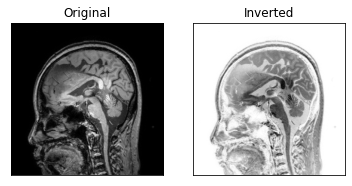

In [9]:
import matplotlib.pyplot as plt

volumeCount = series.getVolumeCount()
sliceCount = series.getSlicesPerVolumeCount()
rowCount = series.getRowCount()
columnCount = series.getColumnCount()

fig, axs = plt.subplots(1,2)
axs[0].imshow(series[int(volumeCount/2)][int(sliceCount/2)].getPixelData().reshape((rowCount, columnCount)), cmap="gray")
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].set_title("Original")

axs[1].imshow(outputSeries[int(volumeCount/2)][int(sliceCount/2)].getPixelData().reshape((rowCount, columnCount)), cmap="gray")
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].set_title("Inverted")
plt.show()